<a href="https://colab.research.google.com/github/saptarshidatta96/MTech_Sem3/blob/main/Determining_Optical_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
img1 = cv2.imread('Frame1.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2= cv2.imread('Frame2.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [4]:
print(img1.shape)
print(img2.shape)

(358, 761, 3)
(357, 761, 3)


In [5]:
img1 = cv2.resize(img1, (640, 320))
img2 = cv2.resize(img2, (640, 320))
M = np.zeros((2,3), dtype = np.float32)

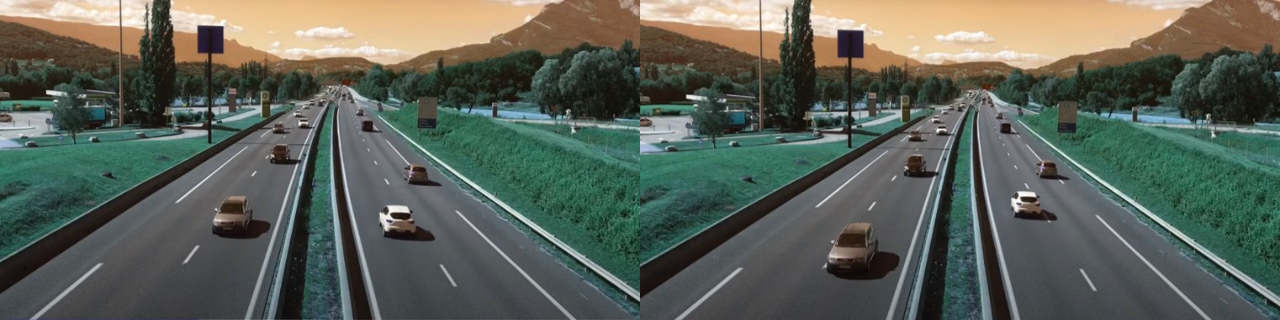

In [8]:
cv2_imshow(np.hstack([img1, img2]))

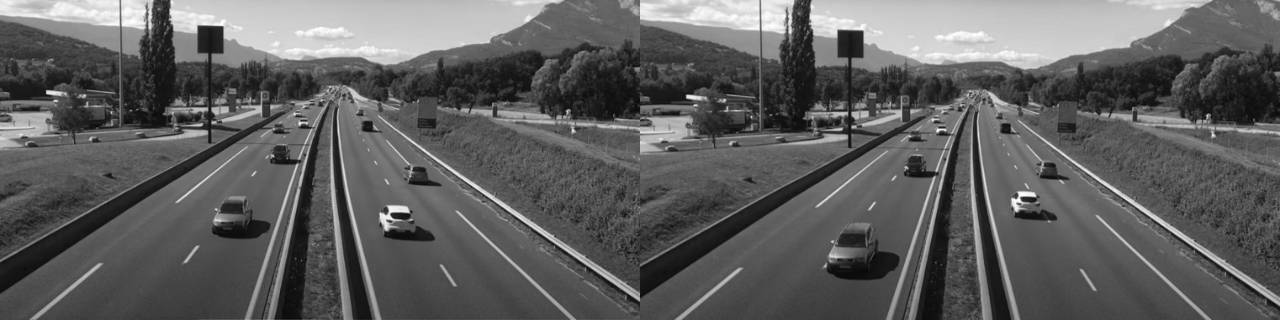

In [10]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
cv2_imshow(np.hstack([gray1, gray2]))

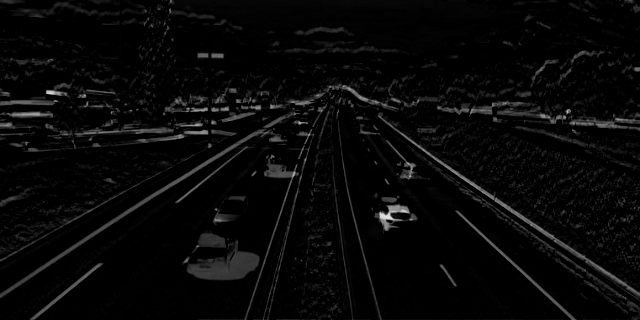

In [12]:
gray_diff = cv2.subtract(gray1, gray2)
cv2_imshow(gray_diff)

In [13]:
flow = cv2.calcOpticalFlowFarneback(gray1, gray2, None, 0.5, 5, 15,  3,  5,  1.2, 0) 

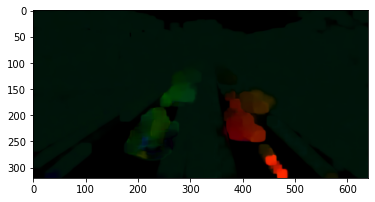

In [14]:
hsv = np.zeros( (320,640,3), dtype = np.uint8)
hsv[...,1] = 255
mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
plt.imshow(rgb)